# Python Project 2

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression

In this project, I am using a dataset from the StatPowers Website. This resource is a dataset called Elmhurst College Gift Aid, sampled from a table of data for all freshman from the 2011 class at Elmhurst College. There are a total of 50 observations.

In [2]:
data_read = pd.read_csv("elmhurst.csv")
data = pd.DataFrame(data_read)
data

,family_income,gift_aid,price_paid
0,92.922,21.720,14.280
1,0.250,27.470,8.530
2,53.092,27.750,14.250
3,50.200,27.220,8.780
4,137.613,18.000,24.000
5,47.957,18.520,23.480
6,113.534,13.000,23.000
7,168.579,13.000,29.000
8,208.115,14.000,28.000
9,12.523,25.470,16.530


# Problem
My problem is that I find that the correlation between the variables seems to be somewhat inconsistent, and from there, I have to investigate where this inconsistency lies.
I am currently going to establish some assumptions. The first assumption is that there is an inverse correlation between the family income and the gift aid granted. Assume that all use units of $1000.

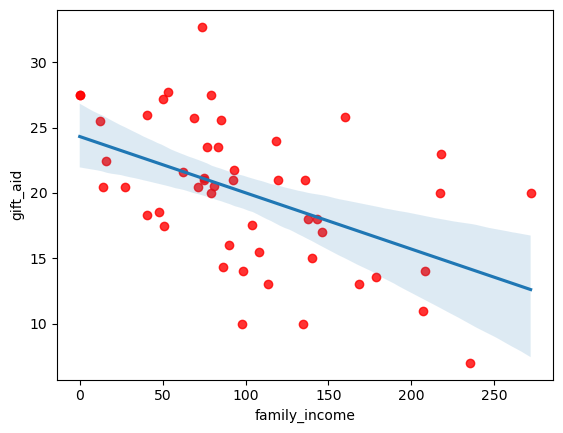

In [3]:
scatter_kws = {'color': 'red'}
ax = sns.regplot(x="family_income", y="gift_aid", data=data, scatter_kws=scatter_kws)

This seems to verify my assumption. To ensure that this is not too far off, I will check to see if there are any outliers in each of the data columns. This will be done in a later section.

My next assumption is that relationship between gift aid and the price paid is also inversely proportional. This is a very clear correlation.

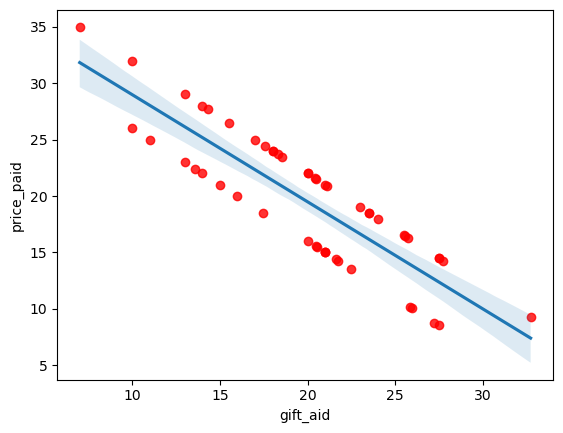

In [4]:
scatter_kws = {'color': 'red'}
ax = sns.regplot(x="gift_aid", y="price_paid", data=data, scatter_kws=scatter_kws)

Next, I'll check to see if there are any outliers that may interfere with my investigation, and I will find them by using the scatterplot function.

<Axes: >

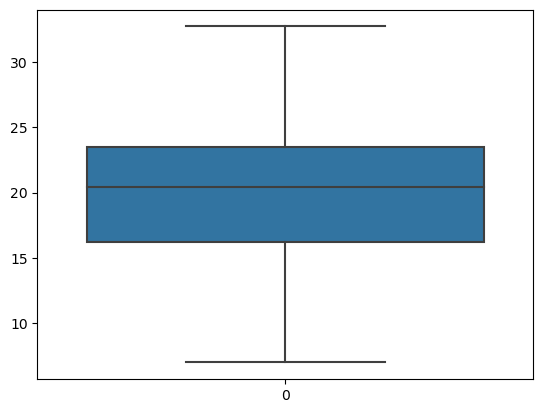

In [5]:
sns.boxplot(data['gift_aid'])

<Axes: >

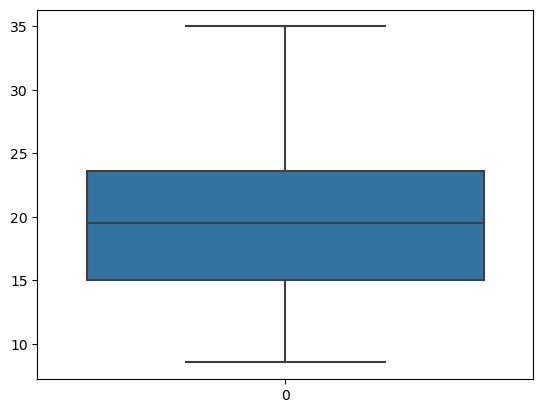

In [6]:
sns.boxplot(data['price_paid'])

<Axes: >

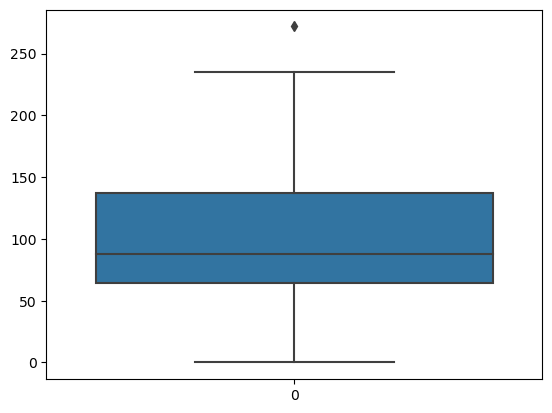

In [7]:
sns.boxplot(data['family_income'])

As one can see, Family Income has an outlier. I will proceed to eliminate this outlier, and print out the number of entries there are now. As you can see, two outliers have been removed.

48

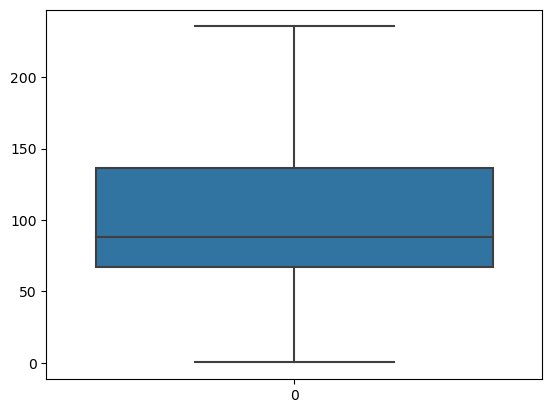

In [8]:
q_low = data["family_income"].quantile(0.01)
q_hi  = data["family_income"].quantile(0.99)
data_filtered = data[(data["family_income"] < q_hi) & (data["family_income"] > q_low)]
sns.boxplot(data_filtered['family_income'])
data_filtered[data_filtered.columns[0]].count()

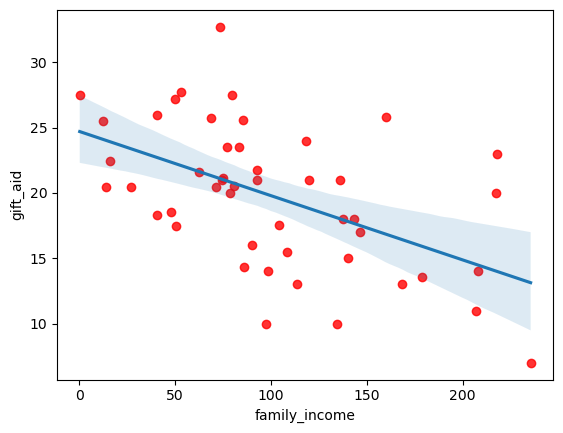

In [9]:
scatter_kws = {'color': 'red'}
ax = sns.regplot(x="family_income", y="gift_aid", data=data_filtered, scatter_kws=scatter_kws)

With the outliers removed, this does verify that there is some negative correlation between the gift aid and family income, though not strong. I suspect that the family income is where the correlation lies.
The major investigation into this assignment I will do is to verify that there is a clear correlation between the family income and the price paid.
This is described in the dataset as 'tuition - gift aid', though I will investigate the strength of the correlations between them.

Text(0, 0.5, 'Price Paid')

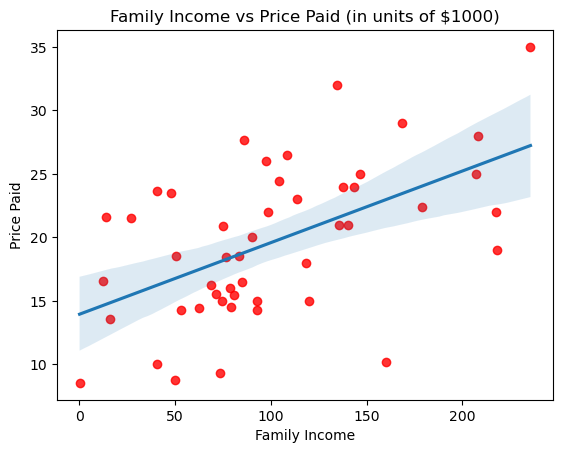

In [10]:
scatter_kws = {'color': 'red'}
ax = sns.regplot(x="family_income", y="price_paid", data=data_filtered, scatter_kws=scatter_kws)
plt.title("Family Income vs Price Paid (in units of $1000)")
plt.xlabel("Family Income")
plt.ylabel("Price Paid")

# Conclusion

My further investigation shows that with the increase in family income, there is also an increase in the price paid for tuition. The overall shape seems to be a large vague shape that curves upwards. There seems to be many inconsistencies in the scatterplot. However, it does not seem like there is a strong correlation, as seen with many of the points being out of the shaded area. My investigation has transitioned from the question of 'Is the correlation strong?' to 'In which variable is the correlation weak, and does it make sense?'. 
In the end, what I realized was that the varying variable was the family income. There was not much of a strong correlation between the family income and the price paid, or the gift aid granted.